1.1586268 0.0001
23836


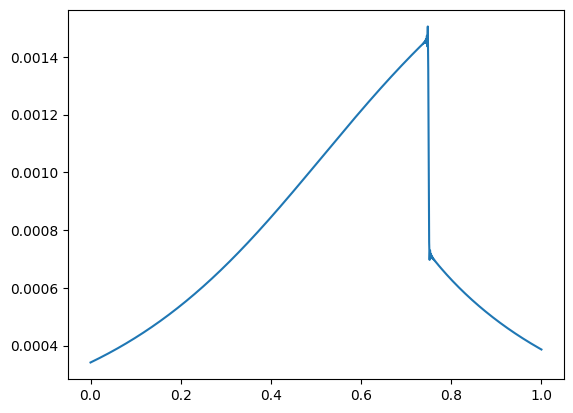

In [2]:
#схема Маккормака
import math as mt
import numpy as np
import matplotlib.pyplot as pl
eps = 10e-4
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n
kappa = 0.5
#tau = 0.00000001
#0.000000001
#0.00000001


#инициализация#
x = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
dA = np.linspace(0, L, n+1)
e = np.linspace(0, L, n+1)

po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = []
u = np.linspace(0, L, n+1)

Q = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
F = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
S = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qnext = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qs = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Fs = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Ss = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2 
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h  #4*x[i] - 2   
    
#нач и гран условия#

#=====================================

#задача 1

# po[0] = 1.0
# u[0] = 1.0237498
# p[0] = 8.0
# po[n] = 0.1933880
# u[n] = 5.2937598
# p[n] = 0.8018469

#задача 2 

po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.8835893
u[n] = 1.1586268
p[n] = 7.0315580

#=====================================

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]
    
#     ШАГ ПО ВРЕМЕНИ    #

tau = 0.0001#0.4 * h/max(u)
# 1)tau = 0.0001 + kappa = 0.5 (работает)
print(max(u),tau)  

#---------------------- #    

#поэлементное умножение нампи
Q[0] = A*po
Q[1] = A*po*u
Q[2] = A*po*(u*u/2 + p/(po*(gamma-1))) 
Qnext = Q.copy()

F[0] = A*po*u
F[1] = A*(po*u*u + p)
F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

S[0] = 0
S[1] = p * dA
S[2] = 0

Qs = Q.copy()
Fs = F.copy()
Ss = S.copy()

#расчет нового  q
#расчет новых давления скорости и плотности
#расчет новых f and s
for k in range(100000): #1) 1000
    
    #первый шаг
    Qnext[:,1:-1] = Q[:,1:-1] - tau/h * (F[:,2:] - F[:,1:-1]) + tau*S[:,1:-1]    
   
    poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Qs[0] = Qnext[0].copy()
    Qs[1] = Qnext[1].copy()
    Qs[2] = Qnext[2].copy()
    
    Fs[0] = A*po*u
    Fs[1] = A*(po*u*u + p)
    Fs[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    Ss[0] = 0
    Ss[1] = p * dA
    Ss[2] = 0
    
    #второй шаг
    Qnext[:,1:-1] = 1/2*( Q[:,1:-1] + Qs[:,1:-1] - tau/h * (Fs[:,1:-1] - Fs[:,0:-2]) + tau*Ss[:,1:-1] )
    
    #poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()
    
    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0
    
    #пересчет с учетом искуственной численной вязкости
    Qnext[:,1:-1] = Q[:,1:-1] + kappa*tau/h*( abs(u[2:]-u[1:-1])*(Q[:,2:] - Q[:,1:-1]) - abs(u[1:-1]-u[0:-2])*(Q[:,1:-1] - Q[:,0:-2]) )
    
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()
    
    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0 
    
    if ( max( abs((po-poprev)/(tau*po)) ) ) < eps:
        print(k)
        break

    
      
pl.plot(x, M)



5.2937598 0.00011334099442895008
18689


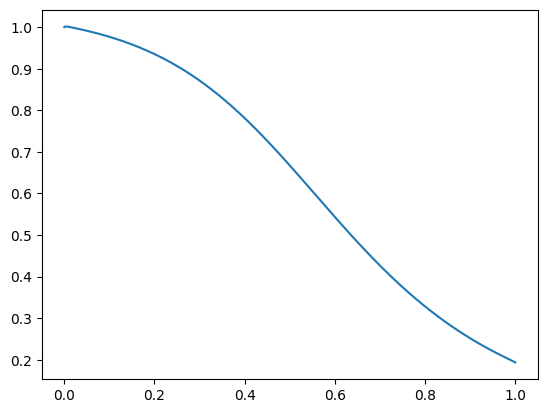

In [97]:
#схема Лакса-Фридрихса
import math as mt
import numpy as np
import matplotlib.pyplot as pl
eps = 0.0001
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n

#tau = 0.000001 ЗАДАН НИЖЕ
#0.000000001
#0.00000001


#инициализация#
x = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
dA = np.linspace(0, L, n+1)
e = np.linspace(0, L, n+1)

po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = np.linspace(0, L, n+1)
u = np.linspace(0, L, n+1)

Q = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
F = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
S = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qnext = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h  #4*x[i] - 2

#нач и гран условия#

#=====================================

#задача 1

po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.1933880
u[n] = 5.2937598
p[n] = 0.8018469

#задача 2

# po[0] = 1.0
# u[0] = 1.0237498
# p[0] = 8.0
# po[n] = 0.8835893
# u[n] = 1.1586268
# p[n] = 7.0315580

#=====================================

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]


#     ШАГ ПО ВРЕМЕНИ    #

tau = 0.6 * h/max(u)
print(max(u),tau)


#поэлементное умножение нампи
Q[0] = A*po
Q[1] = A*po*u
Q[2] = A*po*( u*u/2 + p/(po*(gamma-1)) )
Qnext = Q.copy()

F[0] = A*po*u
F[1] = A*(po*u*u + p)
F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

S[0] = 0
S[1] = p * dA
S[2] = 0

#расчет нового  q
#расчет новых давления скорости и плотности
#расчет новых f and s
for k in range(1000000): #1) 1000

    Qnext[:,1:-1] = 1/2 * (Q[:,0:-2] + Q[:,2:]) - tau/(2*h) * (F[:,2:] - F[:,0:-2]) + tau * S[:,1:-1]

    poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)

    M = u/c

    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()

    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0

    if ( max( abs((po-poprev)/(poprev* tau)) ) ) < eps:
        print(k)
        break



pl.plot(x,po)

with open('2DV.dat','w') as f:
        #f.write('TITLE = "-"\n')
        f.write('VARIABLES=" V1"," V2" \n')
        f.write('ZONE  I = 1001 \n' )#101 101
        for i in range(0,n+1):#0
            a = str(x[i]) +  " " +  str(po[i]) + str(" \n")
            f.write(a)

In [144]:
M = np.linspace(0, L, n+1)
print(M)
print(M*M)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]
[0.00000e+00 1.00000e-06 4.00000e-06 ... 9.96004e-01 9.98001e-01
 1.00000e+00]


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
eps = 10e-4
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n
kappa = 0.5

dA = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
x = np.linspace(0, L, n+1)
po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = np.linspace(0, L, n+1)
u = np.linspace(0, L, n+1)

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h


po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.1933880
u[n] = 5.2937598
p[n] = 0.8018469

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]


In [20]:
def root(f, a, b):

    n = 100

    if f(a) * f(b) < 0:
        for i in range(1, n):

            if f((a + b) / 2) * f(b) < 0:
                a = (a + b) / 2
            else:
                b = (a + b) / 2
            # print('current number of iterations =', n)

    else:
        print('change range or function has not any roots')
    # print('root =', (a + b) / 2)
    return (a + b) / 2

root = 0.30590383418910805
root = 0.3065923975749033
root = 0.30728288795325176
root = 0.30797531084337826
root = 0.30866967177531157
root = 0.3093659762898495
root = 0.31006422993851424
root = 0.31076443828352873
root = 0.3114666068977402
root = 0.312170741364613
root = 0.3128768472781682
root = 0.31358493024294265
root = 0.31429499587394505
root = 0.3150070497966101
root = 0.31572109764675194
root = 0.316437145070517
root = 0.31715519772433853
root = 0.3178752612748841
root = 0.31859734139900786
root = 0.31932144378370075
root = 0.32004757412604
root = 0.32077573813313365
root = 0.3215059415220709
root = 0.32223819001986787
root = 0.32297248936341116
root = 0.32370884529940613
root = 0.32444726358431497
root = 0.3251877499843042
root = 0.32593031027518493
root = 0.3266749502423537
root = 0.3274216756807322
root = 0.3281704923947073
root = 0.3289214061980683
root = 0.3296744229139451
root = 0.3304295483747445
root = 0.3311867884220848
root = 0.3319461489067309
root = 0.332707635688528

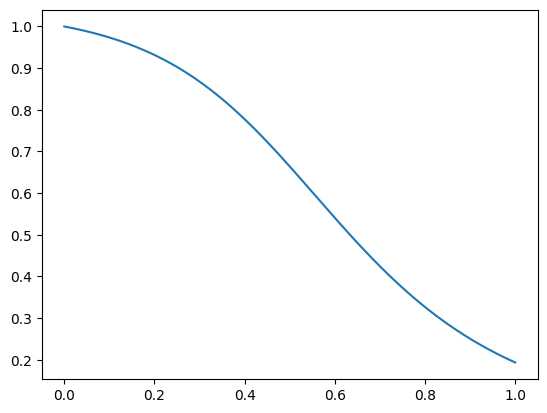

In [149]:
N = 1000
x = np.linspace(0, 1, N+1)

a_0, x_0 = 0.5, 0.5
po_0 = 1
p_0 = 1

def a(x):
    return a_0 + (1-a_0)*(1-x/x_0)**2

def mach(m):
    return a(x[i])/a_0-1/m*((1+(gamma-1)/2*m**2)/(1+1/2*(gamma-1)))**((gamma+1)/(2*(gamma-1)))

def velocity(m):
    return m*(((gamma+1)/2)/(1+(gamma-1)/2*m**2))**(1/2)

def density(m):
    return po_0*(((gamma+1)/2)/(1+(gamma-1)/2*m**2))**(1/(gamma-1))

def pressure(m):
    return p_0*(density(m)/po_0)**gamma

U = np.linspace(0, L, N+1)
Po = np.linspace(0, L, N+1)
P = np.linspace(0, L, N+1)

M = np.linspace(0, L, N+1)

for i in range(0, int(N/2)):
    M[i] = root(mach, 0.001, 1)
M[int(N/2)] = 1
for i in range(int((N+2)/2), N+1):
    M[i] = root(mach, 1, 50)


plt.plot(x, density(M)/density(M[0]))
# plt.plot(x, velocity(M))
# plt.plot(x, pressure(M))
# plt.plot(x, M)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0

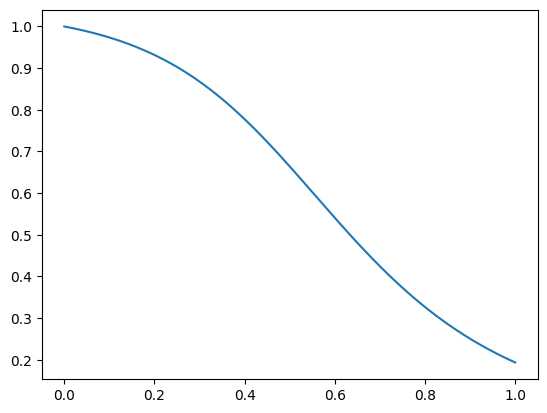

In [132]:
arr1 = []
arr2 = []
filename ="edens.dat"
with open (filename) as f:
    for pair in f:
        x,y = pair.split()
        arr1.append(float(x))
        arr2.append(float(y))

plt.plot(arr1, arr2)

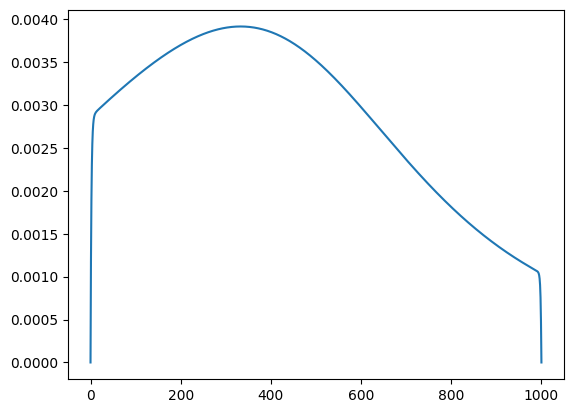

In [151]:
plt.plot(po - density(M)/density(M[0]))

0.668525143318934
4.203670846959563 0.625 0.625
0.625 [1.       0.998002 0.996008 ... 0.996008 0.998002 1.      ]
0.626002
0.627008
0.628018
0.629032
0.63005
0.631072
0.632098
0.633128
0.634162
0.6352
0.636242
0.6372880000000001
0.6383380000000001
0.639392
0.64045
0.6415120000000001
0.642578
0.643648
0.644722
0.6458
0.646882
0.647968
0.649058
0.6501520000000001
0.65125
0.652352
0.6534580000000001
0.654568
0.6556820000000001
0.6568
0.657922
0.6590480000000001
0.660178
0.661312
0.66245
0.6635920000000001
0.664738
0.665888
0.667042
0.6682
0.669362
0.670528
0.671698
0.672872
0.67405
0.675232
0.6764180000000001
0.677608
0.678802
0.68
0.6812020000000001
0.682408
0.6836180000000001
0.6848320000000001
0.68605
0.6872720000000001
0.688498
0.6897280000000001
0.6909620000000001
0.6922
0.6934420000000001
0.6946880000000001
0.6959380000000001
0.697192
0.69845
0.6997120000000001
0.7009780000000001
0.7022480000000001
0.7035220000000001
0.7048000000000001
0.7060820000000001
0.7073680000000001
0.7086580

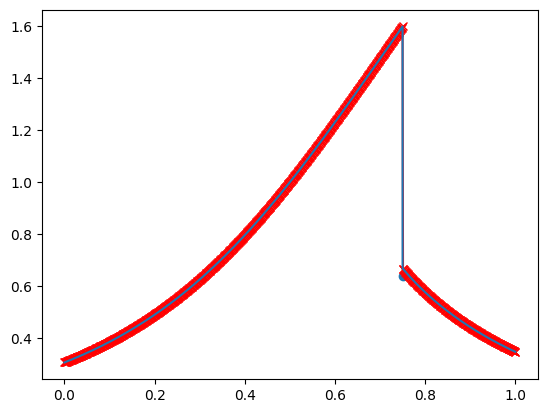

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
Nth = N/2
Nsh = 3*N/4
x = np.linspace(0, 1, N+1)
aMref = 1
a_0, x_0 = 0.5, 0.5
po_0 = 1
p_0 = 1


def a(x):
    return 0.5 + (1-0.5)*(1-x/0.5)**2

def mach(m):
    return -a(x[i])/a_0+aMref/m*((1+(gamma-1)/2*m**2)/(1+1/2*(gamma-1)*aMref**2))**((gamma+1)/(2*(gamma-1)))

def velocity(m):
    return m*(((gamma+1)/2)/(1+(gamma-1)/2*m**2))**(1/2)

def density(m):
    return po_0*(((gamma+1)/2)/(1+(gamma-1)/2*m**2))**(1/(gamma-1))

def pressure(m):
    return p_0*(density(m)/po_0)**gamma

U = np.linspace(0, L, N+1)
Po = np.linspace(0, L, N+1)
P = np.linspace(0, L, N+1)

M = np.linspace(0, L, N+1)

i = int(3*N/4)
M_0 = root(mach, 1, 50)

aMs1 = M_0
aMs2 = np.sqrt((2+(gamma-1)*M_0**2)/(2*gamma*M_0**2-(gamma-1)))


Ps2 = pressure(M_0)*(2*gamma*M_0**2-(gamma-1))/(gamma+1)
Rs2 = density(M_0)*((gamma+1)*Ps2+(gamma-1)*pressure(M_0))/((gamma-1)*Ps2+(gamma+1)*pressure(M_0))
Us2 = density(M_0)*velocity(M_0)/Rs2

for i in range(0, int(Nth)):
    M[i] = root(mach, 0.001, 1)
M[int(Nth)] = 1
for i in range(int(Nth+1), int(Nsh)):
    M[i] = root(mach, 1, 50)
    po_0 = Rs2
    p_0 = Ps2
plt.scatter(x[int(Nsh)], 0.64)
M[int(Nsh)] = aMs1
aMref = aMs2
print(aMs2)
a_0 = a(x[int(Nsh)])
print(mach(0.1), a(x[int(Nsh)]), a_0)
print(a_0, a(x))
for i in range(int(Nsh+1), int(N+1)):

    print(a(x[i]))
    M[i] = root(mach, 0.001, aMs2)

print(aMs1)
plt.plot(x, M, '-rx')
plt.plot(arr1, arr2)
# plt.plot(x, density(M)/density(M[0]))

1002


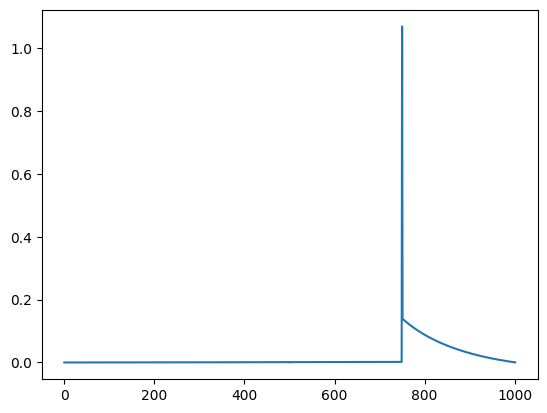

In [5]:
arr1 = []
arr2 = []
filename ="smach.dat"
with open (filename) as f:
    for pair in f:
        x,y = pair.split()
        arr1.append(float(x))
        arr2.append(float(y))

# plt.plot(arr1, arr2)
print(len(arr2))
plt.plot(arr2 - M)